In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# War-Card-Sim Walkthrough

Author: Michael Skrzypiec @skrzym

## Purpose:

This notebook is a walkthrough of a simple python based simulation of the card game 'War'. 

This simulation and walkthrough is a learning project for me to: 
* Work with python some more
* Test some basic python analytics and graphing packages
* Use Jupyter/IPython notebooks
* Keep everything organized with git and publishing on github.
* Show how random the game of 'War' is if you didn't already know...

## How to Play War
Placeholder...

## 10,000 Games Of War
What can we learn from simulating so many games of war? Well lets take a look.

First lets set up and run our simulation for 2 players to play 10,000 games of war.

In [2]:
import war_sim
sim_one = war_sim.Simulation(num_games=2000, num_players=2)
sim_one.run_simulation()

Game 2000 of 2000
War Cards:	3
P1 Wins:	1018
P2 Wins:	982
Avg Len:	238.3845
Avg WDif:	12.9635
Avg Wars:	29.961
Sum Wars:	59922
Annom Rate:	0.0605



So after the simulation finishes we get some basic stats about our 10,000 games.
* War Cards - Number of cards each play at war puts face down on the table before revealing their new battle card.
* P1/P2 Wins - Number of wins each player had.
* Avg Len - How many steps it took on average to complete one game.
* Avg WDiff - How many wins typically separated the winner from the loser of a game.
* Avg Wars - On average how many wars happend during the course of one game.
* Sum Wars - How many wars took place in total.
* Annom Rate - The percent of games where the winner did not also win the most number of wars

## So now what?
Well ... these stats are just some calculations done on lists of data gathered by the simulation. Lets see if we can explore those lists a bit further.

In [3]:
sim_array = []
for cards in range(1,6):
    sim = war_sim.Simulation(num_games=100, num_players=2, num_war_cards=cards)
    sim.run_simulation()
    sim_array.append(sim)

Game 100 of 100
War Cards:	1
P1 Wins:	49
P2 Wins:	51
Avg Len:	427.17
Avg WDif:	17.75
Avg Wars:	53.64
Sum Wars:	5364
Annom Rate:	0.13

Game 100 of 100
War Cards:	2
P1 Wins:	54
P2 Wins:	46
Avg Len:	296.01
Avg WDif:	15.67
Avg Wars:	37.0
Sum Wars:	3700
Annom Rate:	0.11

Game 100 of 100
War Cards:	3
P1 Wins:	56
P2 Wins:	44
Avg Len:	249.33
Avg WDif:	13.23
Avg Wars:	30.98
Sum Wars:	3098
Annom Rate:	0.06

Game 100 of 100
War Cards:	4
P1 Wins:	40
P2 Wins:	60
Avg Len:	194.95
Avg WDif:	11.21
Avg Wars:	23.32
Sum Wars:	2332
Annom Rate:	0.05

Game 100 of 100
War Cards:	5
P1 Wins:	52
P2 Wins:	48
Avg Len:	120.12
Avg WDif:	8.68
Avg Wars:	15.96
Sum Wars:	1596
Annom Rate:	0.03



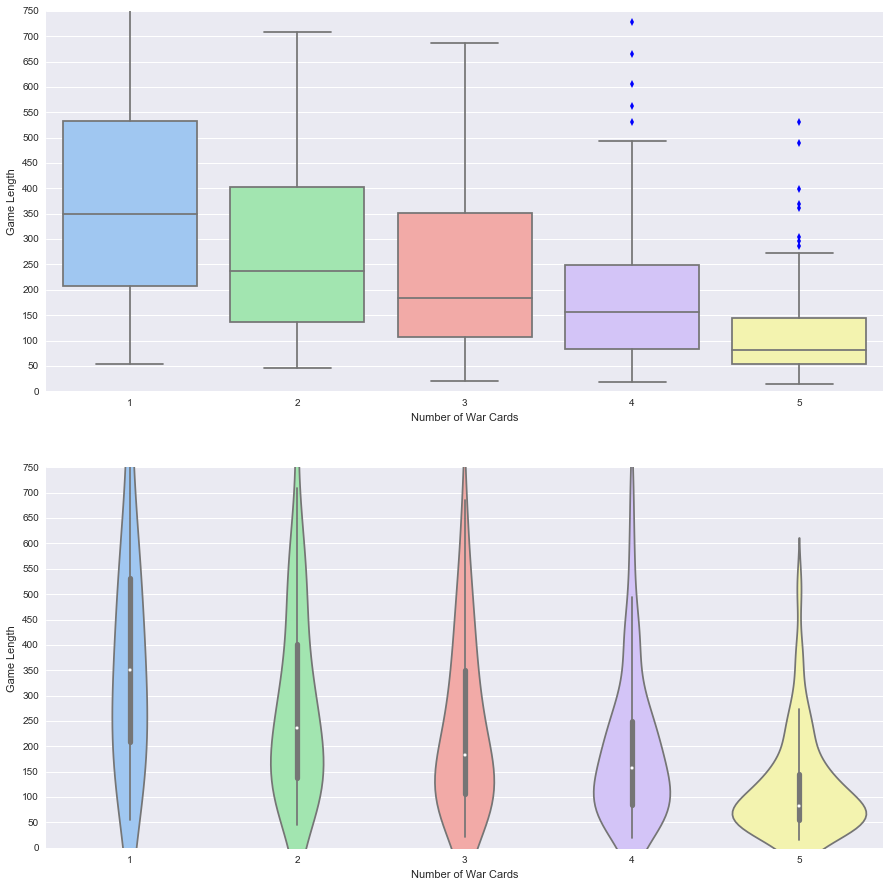

In [5]:
# Put game length data into a pandas data frame
data_stack = []
label_stack = []
for sim in range(len(sim_array)):
    for value in sim_array[sim].sim_length:
        data_stack.append(value)
        label_stack.append(str(sim + 1))
data_dict = {'Number of War Cards': label_stack, 'Game Length': data_stack}
df = pd.DataFrame.from_dict(data=data_dict)
        
# Lets plot the results
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(211)
ax.set_ylim([0,750])
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
sb.boxplot(x='Number of War Cards', y='Game Length', data=df, ax=ax, palette="pastel")

ax = fig.add_subplot(212)
ax.set_ylim([0,750])
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
sb.violinplot(x='Number of War Cards', y='Game Length', data=df, ax=ax, palette="pastel")